In [1]:
import numpy as np 
import gvar as gv
import h5py as h5

from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import *
from lametlat.utils.constants import *
from lametlat.preprocess.read_raw import pt2_to_meff

a = 0.06

In [2]:
data_path = "output/S8T32_Cg5_proton_PDF.h5"

# read data
f = h5.File(data_path, 'r')

# read 2pt data
pt2_real = (f['2pt']['px0_py0_pz0_pt0']['gamma_I']['real'][:] - f['2pt']['px0_py0_pz0_pt0']['gamma_T']['real'][:])/4
pt2_imag = (f['2pt']['px0_py0_pz0_pt0']['gamma_I']['imag'][:] - f['2pt']['px0_py0_pz0_pt0']['gamma_T']['imag'][:])/4

pt2_real_jk = jackknife(pt2_real)
pt2_imag_jk = jackknife(pt2_imag)

pt2_real_jk_avg = jk_ls_avg(pt2_real_jk)
pt2_imag_jk_avg = jk_ls_avg(pt2_imag_jk)

print(np.shape(pt2_real_jk_avg))
print(pt2_real_jk_avg[:20])


(32,)
[-0.4772(10) 0.000446(11) 1.100(36)e-05 3.54(17)e-07 1.590(92)e-08
 9.07(60)e-10 6.44(51)e-11 5.21(48)e-12 4.40(49)e-13 4.10(59)e-14
 3.96(80)e-15 4.5(1.5)e-16 5.4(2.4)e-17 6.4(3.5)e-18 7.7(4.0)e-19
 9.9(6.8)e-20 7.7(2.7)e-19 6.0(2.1)e-18 4.7(1.4)e-17 3.81(95)e-16]


/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in log
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.


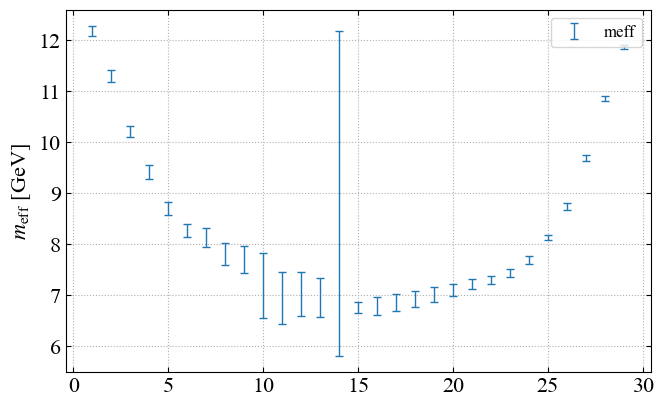

In [3]:
meff = pt2_to_meff(pt2_real_jk_avg, boundary="periodic") / a * GEV_FM

fig, ax = default_plot()
ax.errorbar(np.arange(len(meff)), gv.mean(meff), gv.sdev(meff), label='meff', **errorb)
ax.legend(loc="upper right", ncol=2, **fs_small_p)
ax.set_ylabel(r"$m_{\rm eff}$ [GeV]", **fs_p)
plt.tight_layout()
plt.show()

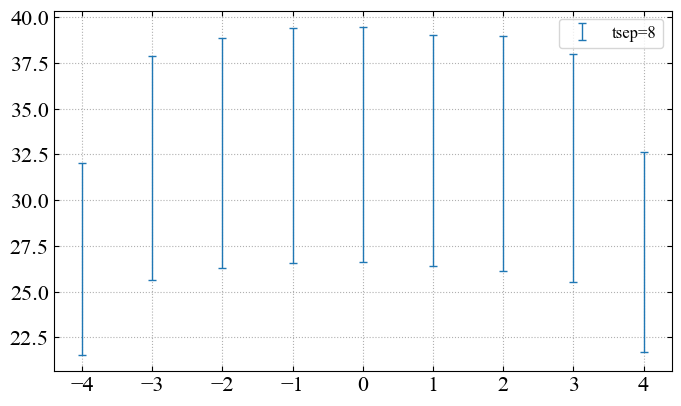

In [4]:
z = 0
tau_cut = 0

fig, ax = default_plot()

for tsep in [8]:
    # read 3pt data
    pt3_real = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['real']
    pt3_imag = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['imag']

    pt3_real_jk = jackknife(pt3_real)
    pt3_imag_jk = jackknife(pt3_imag)

    pt3_real_jk_avg = jk_ls_avg(pt3_real_jk)
    pt3_imag_jk_avg = jk_ls_avg(pt3_imag_jk)

    ratio_re = pt3_real_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]
    ratio_im = pt3_imag_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]

    tau_ls = np.arange(tau_cut, tsep+1-tau_cut) - tsep/2

    ax.errorbar(tau_ls, gv.mean(ratio_re), gv.sdev(ratio_re), label=f'tsep={tsep}', **errorb)

ax.legend(loc="upper right", ncol=2, **fs_small_p)
plt.tight_layout()
plt.show()
